201884055 최원준


- Leave	가입해지여부(1이면 해지)
- MemberWeeks	가입기간
- NewContract	가입갱신여부(1이면 갱신)
- IsData	데이터요금제사용여부(1이면 사용)
- DataAmount	데이터사용량(GB)
- Callcenter	고객센터전화량
- CalMins	월평균전화량(분)
- CalCounts	월평균전화수(횟수)
- MonthlyFee	월평균요금
- OverFee	초과요금
- RoamingMin	로밍시간(분)

In [1]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# 데이터 가져오기
telco = pd.read_csv("C:/Users/cwj/Desktop/python/telco.csv")
 
telco.head()

,Leave,MemberWeeks,NewContract,IsData,DataAmount,Callcenter,CalMins,CalCounts,MonthlyFee,OverFee,RoamingMin
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [4]:
# 데이터 타입 확인
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Leave        3333 non-null   int64  
 1   MemberWeeks  3333 non-null   int64  
 2   NewContract  3333 non-null   int64  
 3   IsData       3333 non-null   int64  
 4   DataAmount   3333 non-null   float64
 5   Callcenter   3333 non-null   int64  
 6   CalMins      3333 non-null   float64
 7   CalCounts    3333 non-null   int64  
 8   MonthlyFee   3333 non-null   float64
 9   OverFee      3333 non-null   float64
 10  RoamingMin   3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


In [25]:
# 시각화 스타일 변경
plt.style.use('seaborn')
sns.set(font_scale=1.5)

<ipython-input-27-ff54501ced75>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  telco[['DataAmount', 'Callcenter', 'CalMins','CalCounts','RoamingMin']].hist(bins=30, ax=ax)


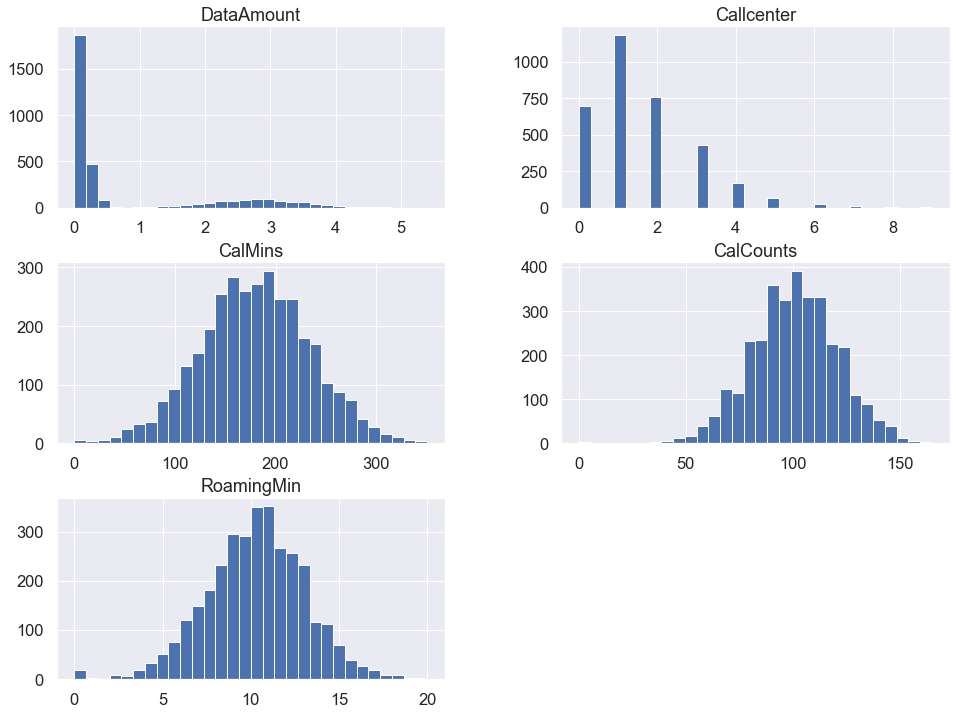

In [27]:
#시각화 - 히스토그램
fig, ax = plt.subplots(figsize=(16,12))
telco[['DataAmount', 'Callcenter', 'CalMins','CalCounts','RoamingMin']].hist(bins=30, ax=ax)
plt.show()
# 핸드폰 사용정보인 'DataAmount', 'Callcenter', 'CalMins','CalCounts','RoamingMin' 의 분포를 간단하게 확인
# 특이한점으로는 데이터사용량(DataAmount)과 고객센터전화량(Callcenter)이 x축이 0과 가까울 때 값이 높음. 데이터사용자와 콜센터 통화하는사람이 적어보임.
# 월평균전화량(분)과 월평균전화횟수, 로밍시간이 서로 비슷한 형태의 그래프를 보여줌.

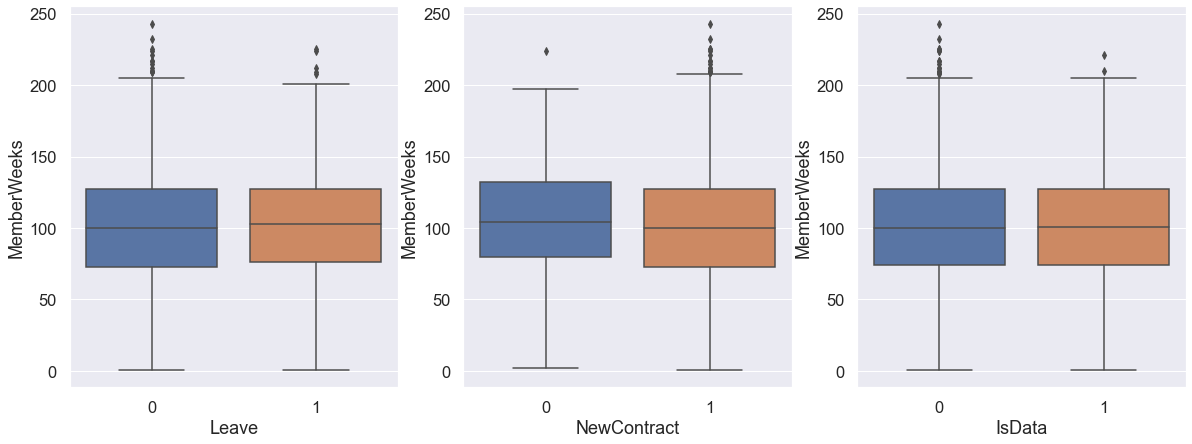

In [43]:
# 시각화 -  가입기간에 따른 가입해지여부와 가입갱신여부, 데이터요금제사용여부 박스플롯
fig, ax = plt.subplots(1, 3, figsize=(20,7))

sns.boxplot(data=telco, x='Leave', y='MemberWeeks', ax=ax[0])
sns.boxplot(data=telco, x='NewContract', y='MemberWeeks',ax=ax[1])
sns.boxplot(data=telco, x='IsData', y='MemberWeeks',ax=ax[2])
 
plt.show()
# 박스플롯을 보면 가입기간에 따른 여부조건들의 큰 차이가 없어보임.

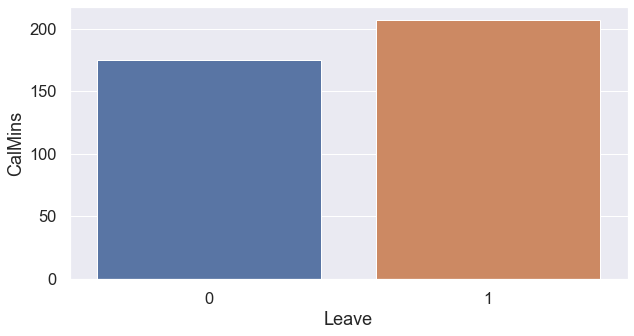

In [85]:
# 시각화 - 가입해지여부에 따른 월평균전화량를 비교하는 그래프
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(data=telco, x='Leave', y='CalMins', ax=ax, ci=None)
plt.show()
# 월평균전화량은 해지했을때 전화량이 조금더 높음.

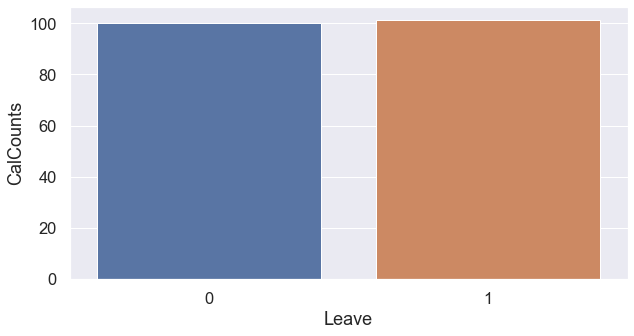

In [86]:
# 시각화 - 가입해지여부에 따른 월평균전화횟수를 비교하는 그래프
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(data=telco, x='Leave', y='CalCounts', ax=ax, ci=None)
plt.show()
# 가입해지여부와는 상관없이 월평균전화횟수는 특별한 데이터 결과는 없음

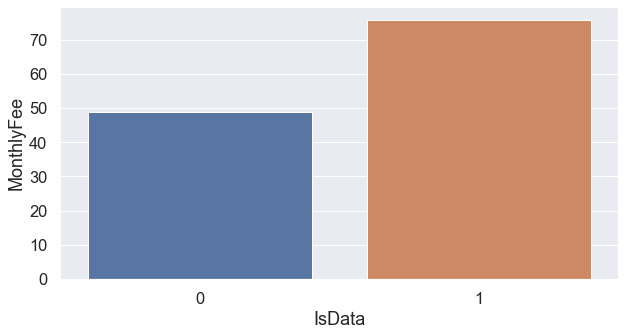

In [95]:
# 시각화6 - 데이터 요금제 사용여부에 따른 월평균요금비교
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(data=telco, x='IsData', y='MonthlyFee', ax=ax, ci=None)
plt.show()
# 데이터요금제를 사용했을 때 월평균요금이 더 높은걸 알 수 있음.

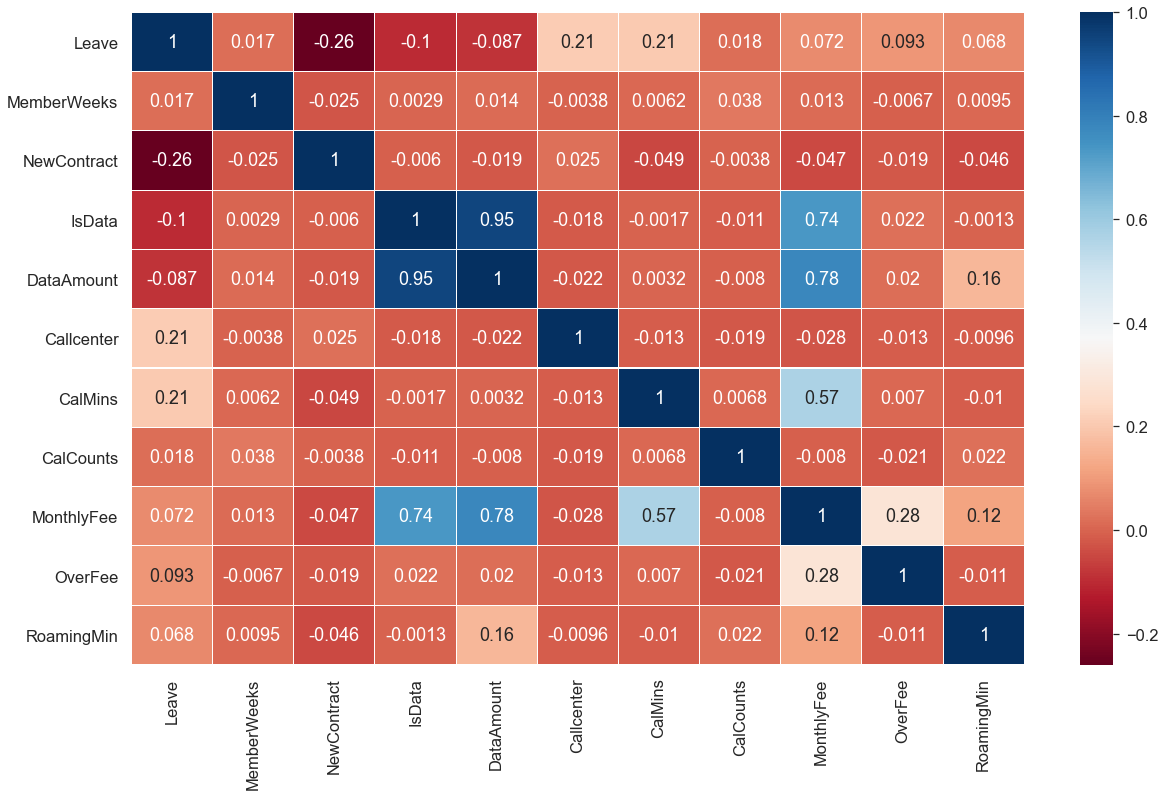

In [96]:
# 시각화 - 히트맵
telcohm = telco[['Leave','MemberWeeks','NewContract','IsData','DataAmount', 'Callcenter', 'CalMins','CalCounts','MonthlyFee','OverFee','RoamingMin']].corr()
fig, ax = plt.subplots(figsize=(20,12))
sns.heatmap(data=telcohm, ax=ax, linewidths=0.1, linecolor='white', annot=True, cmap=plt.cm.RdBu)
plt.show()
# 마지막으로 각 피처들의 상관관계를 보기 위해 히트맵으로 확인
# 데이터요금제사용여부에 따른 데이터사용량,월평균요금과 데이터사용량에 따른 월평균 요금이 상관관계가 높아보임.